Домашнее задание "Марковские случайные процессы""

Преподаватель: Артур Сапрыкин, Наталья Баданина

— Скачайте текст войны и мир (ссылка на github и гугл диск). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов

— Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM. Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.



In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [2]:
with open(r'C:\Users\User\DS\tsa\04\WP\tom_1.txt', 'r', encoding='utf-8' ) as f:
    text = f.read().lower()
# text = re.sub('[^a-z]','', text)

In [4]:
# jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

In [16]:
# — Скачайте текст войны и мир (ссылка на github и гугл диск).
import pandas as pd
import glob

path = r'C:\Users\User\DS\tsa\04\WP' # use your path
filenames = glob.glob(path + "/*.txt")
li = []

for filename in filenames:
    with open(filename, 'r', encoding='utf-8') as f:
        text = f.read().lower()
        # Очистите его, оставив только русские буквы и символы пробела.
        text = re.sub('[^а-я]','', text)
        li.append(text)
        
print(li)

['левтолстойвойнаимиртомтомчастьперваячастьораячастьтретьятомлевниколаевичтолстойвойнаимиртомчастьперваяепоместьямойверныйрабнучтокнязьгенуаилуккасталинебольшекакпоместьямифамилиибонапартенетяваспредупреждаюесливымненескажетечтоунасвойнаесливыещепозволитесебезащищатьвсегадостивсеужасыэтогоантихристаправояверючтоонантихристявасбольшенезнаювыужнедругмойвыужнемойверныйрабкаквыговоритенуздравствуйтездравствуйтеявижучтояваспугаюсадитесьирассказывайтетакговорилавиюлегодаизвестнаяаннапавловнашерерфрейлинаиприближеннаяимператрицымариифеодоровнывстречаяважногоичиновногокнязявасилияпервогоприехавшегонаеевечераннапавловнакашляланесколькоднейунеебылгриппкаконаговорилагриппбылтогдановоесловоупотреблявшеесятолькоредкимивзаписочкахразосланныхутромскраснымлакеембылонаписанобезразличиявовсехилиесливасграфиликнязьнетввидуничеголучшегоиеслиперспективавечераубеднойбольнойнеслишкомваспугаеттоябудуоченьрадавидетьваснынчеусебямеждусемьюидесятьючасамианнашерерокакоежестокоенападениеотвечалнискольконесмутясьта

In [17]:
# Постройте матрицу переходных вероятностей.
RUSSIAN = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
POS = {l: i for i, l in enumerate(RUSSIAN)}
print(POS)

{'а': 0, 'б': 1, 'в': 2, 'г': 3, 'д': 4, 'е': 5, 'ё': 6, 'ж': 7, 'з': 8, 'и': 9, 'й': 10, 'к': 11, 'л': 12, 'м': 13, 'н': 14, 'о': 15, 'п': 16, 'р': 17, 'с': 18, 'т': 19, 'у': 20, 'ф': 21, 'х': 22, 'ц': 23, 'ч': 24, 'ш': 25, 'щ': 26, 'ъ': 27, 'ы': 28, 'ь': 29, 'э': 30, 'ю': 31, 'я': 32}


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


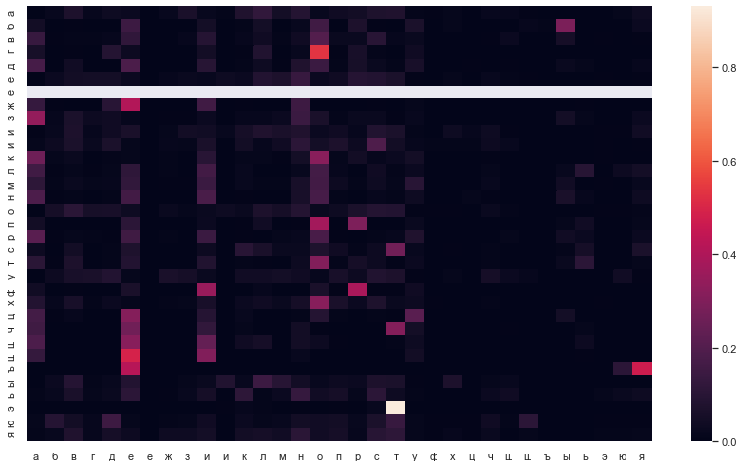

In [19]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()


In [26]:
# Посчитайте вероятность встретить строку из 4-х символов, 
# которая начинается п, а кончается на р; 
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
max_prob = 0
max_str = ''
for c in RUSSIAN:
    for d in RUSSIAN:
        proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], POS[d]] * probabilities[POS[d], end]
        if proba > 0:
#             print(''.join(['п', c, d, 'р']), proba)
            if proba > max_prob:
                max_prob = proba
                max_str = ''.join(['п', c, d, 'р'])
print(f'Слово с максимальной вероятностью: {max_str}, вероятность: {max_prob}')

Слово с максимальной вероятностью: прер, вероятность: 0.00012821167950020674


In [33]:
# Используя матрицу переходных вероятностей сгенерируйте слово, 
# начинающееся с буквы “Б” и имеющее длину 8-мь символов
s = []
start = 'б'
s.append(start)
length = 7
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

беруюсте


#  Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM. 
# Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.

In [41]:
import pandas as pd
import numpy as np
import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from math import sqrt
import scipy.stats as scs

In [43]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [45]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


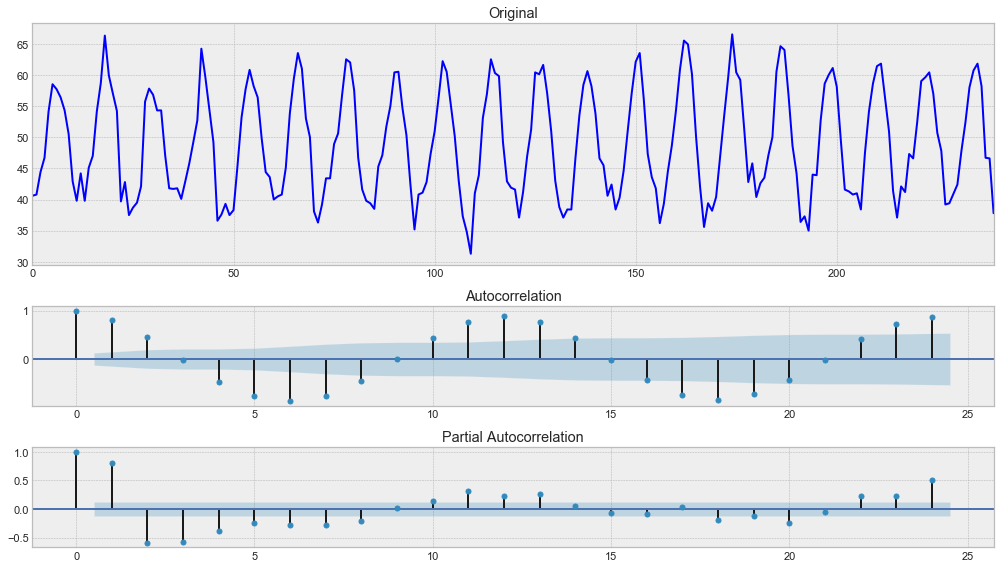

In [46]:
# I chode this TS because it's not contains trend.
temperature = pd.read_csv("../01/Series/mean-monthly-air-temperature-deg.csv")['Deg']
tsplot(temperature)

# ("../01/Series/monthly-boston-armed-robberies-j.csv")['Count']

In [51]:
temperature

0      40.6
1      40.8
2      44.4
3      46.7
4      54.1
       ... 
235    61.8
236    58.2
237    46.7
238    46.6
239    37.8
Name: Deg, Length: 240, dtype: float64

In [50]:
from hmmlearn.hmm import GaussianHMM
values = temperature.values.reshape(-1,1)
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -855.6201905961935
2 -767.9220576513211
3 -729.7130998068977
4 -698.3653054078603
5 -659.6272033153606
6 -662.219428635348
7 -623.3216329376402
8 -602.2744699474899
9 -595.1262684887936
10 -575.3991896303003
11 -564.8621959560287
12 -569.6662658780103
13 -555.3351321204076


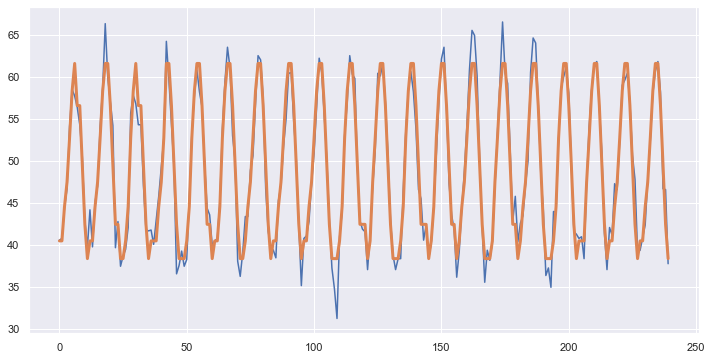

In [52]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [53]:
temperature

0      40.6
1      40.8
2      44.4
3      46.7
4      54.1
       ... 
235    61.8
236    58.2
237    46.7
238    46.6
239    37.8
Name: Deg, Length: 240, dtype: float64